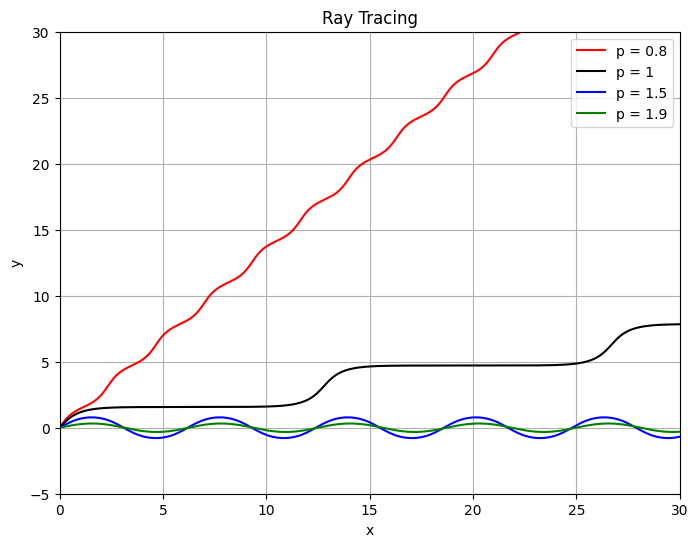

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


def ray(x: np.ndarray, t: float) -> np.ndarray:
    """Функция, описывающая систему дифференциальных уравнений для луча"""
    dx = np.zeros(4)
    dx[0] = x[2] / (1 + np.cos(x[1]) ** 2) ** 2
    dx[1] = x[3] / (1 + np.cos(x[1]) ** 2) ** 2
    dx[2] = 0
    dx[3] = (-2 * np.sin(x[1]) * np.cos(x[1])) / (1 + np.cos(x[1]) ** 2)
    return dx


# Значения параметра p для различных случаев
p_values = [0.8, 1, 1.5, 1.9]
colors = ["r", "k", "b", "g"]

# Временные точки для решения ОДУ
t = np.linspace(0, 100, 1000)

plt.figure(figsize=(8, 6))

# Решение уравнений для каждого значения p и построение графика
for p, color in zip(p_values, colors):
    # Вычисление q для данного p
    q = np.sqrt((1 + np.cos(0) ** 2) ** 2 - p**2)
    # Начальные условия
    x0 = np.array([0, 0, p, q])
    # Решение уравнений
    x = odeint(ray, x0, t)
    # Построение графика
    plt.plot(x[:, 0], x[:, 1], color, label=f"p = {p}")

# Настройка осей и подписей
plt.axis([0, 30, -5, 30])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ray Tracing")
plt.legend()
plt.grid()
plt.show()